In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

path = "/home/daniel/Data/arrays/X1.txt"
X = np.loadtxt(path)
print(X.shape)
# separando datos en datos de entrenamiento y datos de testeo (0.25)
X_train, X_test, y_train, y_test = train_test_split(X[:,:-1],X[:,-1])

/home/daniel/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/daniel/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/daniel/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/daniel/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(83616, 27)


In [3]:
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
clf3 = XGBClassifier()
clf4 = SVC()
clf5 = LogisticRegression()
clf6 = AdaBoostClassifier()
clf7 = KNeighborsClassifier()
clf8 = MLPClassifier()

classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]

## RandomForest

### n_estimators = 60

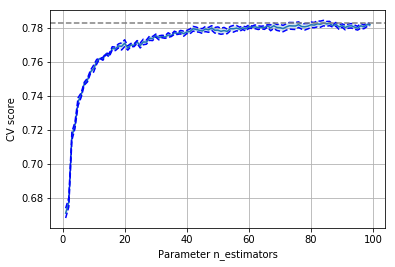

In [3]:
parameter = "n_estimators"
alphas = range(1,100)
tuned_parameters = [{parameter: alphas}]
n_folds = 3

clf = GridSearchCV(clf1, tuned_parameters, cv=n_folds, refit=False, n_jobs=-1)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.plot(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas, scores + std_error, 'b--')
plt.plot(alphas, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV score')
plt.xlabel('Parameter %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

### max_features = "log2"

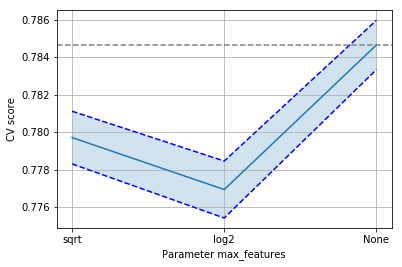

In [4]:
parameter = "max_features"
alphas = ["sqrt", "log2", None]
alphas2 = ["sqrt", "log2", "None"]
tuned_parameters = [{parameter: alphas}]
n_folds = 3

clf = GridSearchCV(RandomForestClassifier(n_estimators=60), tuned_parameters, cv=n_folds, refit=False, n_jobs=-1)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.plot(alphas2, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas2, scores + std_error, 'b--')
plt.plot(alphas2, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas2, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV score')
plt.xlabel('Parameter %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

### max_depth = 25

29
29


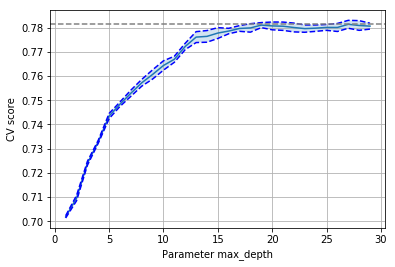

In [5]:
parameter = "max_depth"
alphas = range(1,30)
tuned_parameters = [{parameter: alphas}]
n_folds = 3

clf = GridSearchCV(RandomForestClassifier(n_estimators=60), tuned_parameters, cv=n_folds, refit=False, n_jobs=-1)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print(len(alphas))
print(len(scores))
plt.plot(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas, scores + std_error, 'b--')
plt.plot(alphas, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV score')
plt.xlabel('Parameter %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

In [7]:
def find_parameters(clf, parameter, alphas, alphas2=None):

    tuned_parameters = [{parameter: alphas}]
    n_folds = 3
    
    alph = None
    if alphas2==None: alph=alphas
    else: alph=alphas2

    clf = GridSearchCV(clf, tuned_parameters, cv=n_folds, refit=False, n_jobs=15)
    clf.fit(X_train, y_train)
    scores = clf.cv_results_['mean_test_score']
    scores_std = clf.cv_results_['std_test_score']

    plt.plot(alph, scores)
    std_error = scores_std / np.sqrt(n_folds)
    plt.plot(alph, scores + std_error, 'b--')
    plt.plot(alph, scores - std_error, 'b--')
    std_error = scores_std / np.sqrt(n_folds)
    plt.fill_between(alph, scores + std_error, scores - std_error, alpha=0.2)
    locs, labels = plt.yticks()
    #plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.ylabel('CV score')
    plt.xlabel('Parameter %s'%parameter)
    plt.grid()
    #plt.ylim(0, 1.1)
    plt.show()

## DecisionTreeClassifier

### max_depth = 7

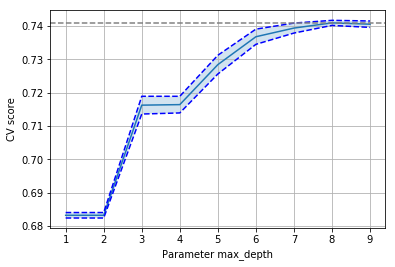

In [7]:
find_parameters(DecisionTreeClassifier(), "max_depth", range(1,10))

## XGBoost

### n_estimators=350

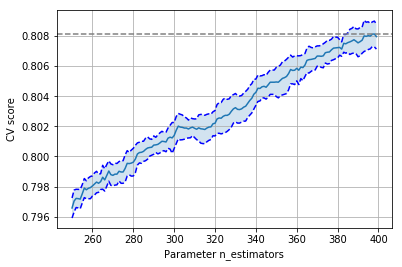

In [8]:
find_parameters(XGBClassifier(), "n_estimators", range(380,500))

### learning_rate=0.1

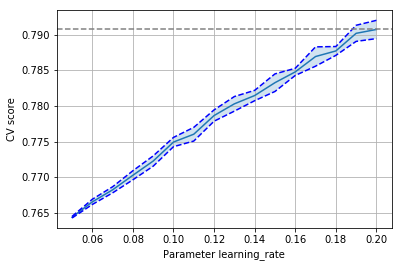

In [9]:
find_parameters(XGBClassifier(), "learning_rate", np.arange(0.1,3.0,0.1))

### max_depth=3

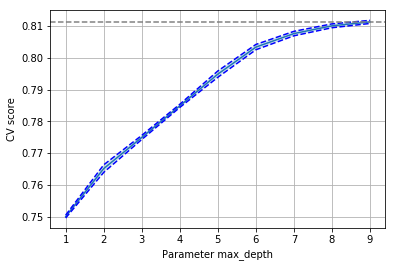

In [10]:
find_parameters(XGBClassifier(), "max_depth", range(1,20))

##  LogisticRegression

### C=1

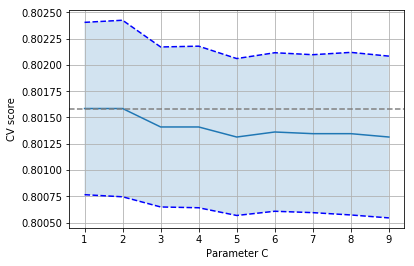

In [11]:
#find_parameters(LogisticRegression(), "C", np.arange(1,10,1.0))

## AdaBoostClassifier

### n_estimators=99

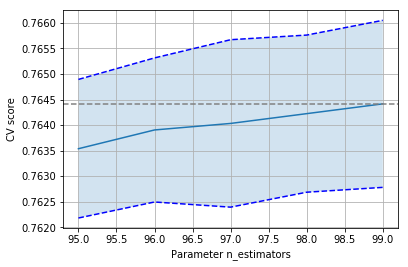

In [ ]:
find_parameters(AdaBoostClassifier(), "n_estimators", range(98,200))

### learning_rate=0.6

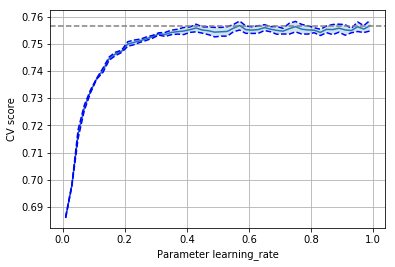

In [ ]:
find_parameters(AdaBoostClassifier(), "learning_rate", np.arange(0.01,1,0.02))

## KNeighborsClassifier

### n_neighbors=17

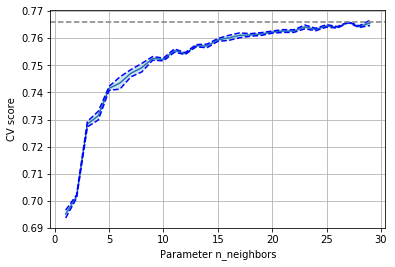

In [ ]:
find_parameters(KNeighborsClassifier(), "n_neighbors", range(15,45))

## MLPClassifier

### hidden_layer_sizes=23

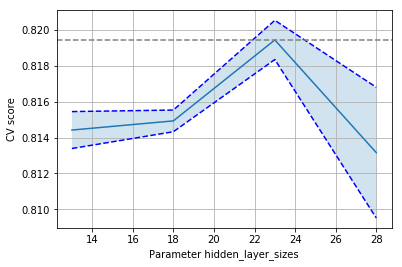

In [ ]:
find_parameters(MLPClassifier(), "hidden_layer_sizes", [(x,) for x in range(13,30,5)], [x for x in range(13,30,5)])

### activation="logistic"

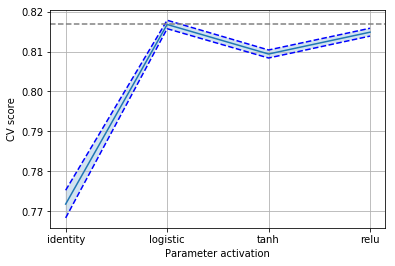

In [ ]:
#find_parameters(MLPClassifier(random_state=5, hidden_layer_sizes=(26,)), "activation", ['identity', 'logistic', 'tanh', 'relu'])

### solver = "adam"

In [ ]:
find_parameters(MLPClassifier(random_state=5, hidden_layer_sizes=(26,)), "solver", ['lbfgs', 'sgd', 'adam'])

In [ ]:
help(clf5)

In [ ]:
for x in range(1,20,2): print(x)